# Estadística Descriptiva — Pima Indians Diabetes
**Autor:** Aaron Cuevas · **Fecha:** 2025-10-31

## Objetivo de la actividad
Replicar los pasos de salón sobre el dataset `diabetes.csv` (**Pima Indians Diabetes**):
1. **Cargar** los datos.
2. Verificar **cantidad de datos** (filas/columnas) y **nombres de variables**.
3. Revisar **tipos de dato** e **identificar valores nulos**.
4. **Seleccionar** tres variables por integrante; aquí se analizan **Pregnancies**, **DiabetesPedigreeFunction** y **Outcome** (común para todos).
5. Para cada variable seleccionada: **tipo/subtipo**, **rangos (mín–máx)**, **media**, **mediana**, **desviación estándar (DE)** y **comentarios**.
6. Realizar **3 consultas** sobre los datos con las variables asignadas.

## 1. Carga de datos

In [1]:
import pandas as pd, numpy as np
from pathlib import Path

candidates = [Path("data/diabetes.csv"), Path("diabetes.csv")]
for p in candidates:
    if p.exists():
        CSV_PATH = p
        break
else:
    raise FileNotFoundError("No se encontró diabetes.csv.")

df = pd.read_csv(CSV_PATH)

# Ceros imposibles como NA en columnas clínicas estándar
cols_zero_na = [c for c in ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"] if c in df.columns]
df[cols_zero_na] = df[cols_zero_na].replace(0, np.nan)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## 2. Cantidad de datos y variables

In [2]:
df.shape, df.columns.tolist()

((768, 9),
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age',
  'Outcome'])

## 3. Información general y valores nulos

In [3]:
df.info()
print("\nValores nulos por columna:")
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB

Valores nulos por columna:


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## 4. Variables seleccionadas y tipología
- **Pregnancies**: *cuantitativa discreta* (conteo de embarazos; 0 es posible).
- **DiabetesPedigreeFunction (DPF)**: *cuantitativa continua* (índice de antecedentes familiares).
- **Outcome**: *categórica binaria* (0 = no diabetes, 1 = diabetes). Su media equivale a la prevalencia muestral.

## 5. Estadísticos descriptivos

In [4]:
sel = ["Pregnancies","DiabetesPedigreeFunction","Outcome"]
stats = df.agg({
    "Pregnancies": ["min","max","mean","median","std"],
    "DiabetesPedigreeFunction": ["min","max","mean","median","std"],
    "Outcome": ["min","max","mean"]
})
stats

,Pregnancies,DiabetesPedigreeFunction,Outcome
min,0.000000,0.078000,0.000000
max,17.000000,2.420000,1.000000
mean,3.845052,0.471876,0.348958
median,3.000000,0.372500,NaN
std,3.369578,0.331329,NaN


In [5]:
def iqr(s): 
    return s.quantile(0.75) - s.quantile(0.25)
pd.DataFrame({
    "Pregnancies_IQR":[iqr(df["Pregnancies"])],
    "DPF_IQR":[iqr(df["DiabetesPedigreeFunction"])]
})

,Pregnancies_IQR,DPF_IQR
0,5.0,0.3825


## 6. Visualización

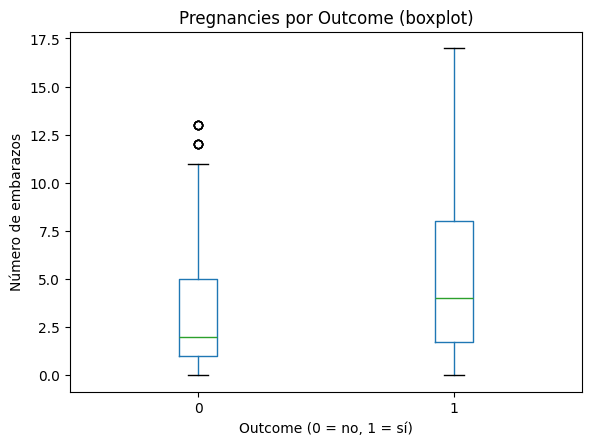

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    df
except NameError:
    df = pd.read_csv("data/diabetes.csv")

# Boxplot de Pregnancies por Outcome (comparación directa)
ax = df[['Pregnancies', 'Outcome']].boxplot(
    by='Outcome', column='Pregnancies', grid=False
)
plt.title('Pregnancies por Outcome (boxplot)')
plt.suptitle('')  # quita el subtítulo automático de pandas
plt.xlabel('Outcome (0 = no, 1 = sí)')
plt.ylabel('Número de embarazos')
plt.show()

### Conclusiones — Boxplot de `Pregnancies` vs. `Outcome`

- **Desplazamiento del nivel central:** la **mediana** del grupo `Outcome = 1` es **mayor** que la del grupo `Outcome = 0`; los positivos tienden a registrar más embarazos.
- **Dispersión y cola derecha:** el grupo `Outcome = 1` presenta IQR y **bigotes superiores** más altos, con **más atípicos elevados**, lo que sugiere una distribución más cargada hacia valores grandes.
- **Solapamiento notable:** pese al desplazamiento, los boxplots se solapan de forma amplia; hay muchos casos con pocos embarazos en ambos grupos y algunos con muchos embarazos que siguen siendo negativos. La separación **no es nítida**.
- **Lectura estadística:** la señal de `Pregnancies` frente a `Outcome` es real pero moderada; útil para **ordenar** riesgo, insuficiente como predictor **en solitario**.
- **Interpretación sustantiva (no causal):** un mayor número de embarazos refleja en parte **acumulación temporal y contexto demográfico/biológico**; funciona como **indicador** asociado al resultado, sin implicar causalidad directa.

,corr_con_Outcome
Glucose,0.495
BMI,0.314
Insulin,0.303
SkinThickness,0.259
Age,0.238
Pregnancies,0.222
DiabetesPedigreeFunction,0.174
BloodPressure,0.171


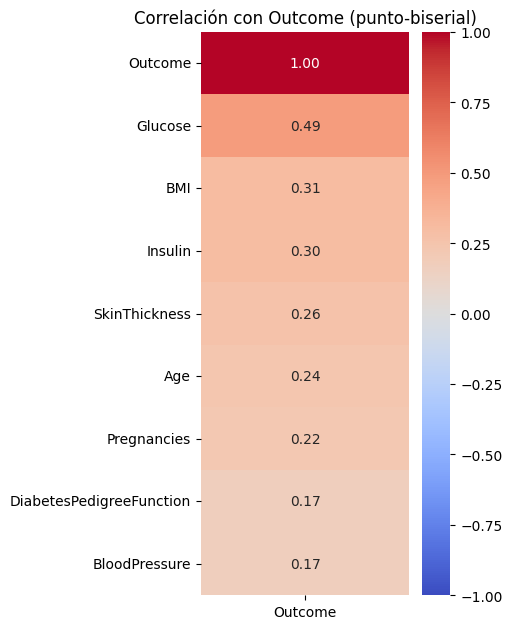

In [22]:
t=True, fmt=".2f",
    vmin=-1, vmax=1, cmap="coolwarm",
    cbar=True, square=False
)
plt.title("Correlación con Outcome (punto-biserial)")
plt.tight_layout()
plt.show()

## 7. Consultas

In [24]:
# Q1: Pacientes con ≥5 embarazos y Outcome=1
q1 = (df.query("Pregnancies >= 5 and Outcome == 1")
        [["Pregnancies","DiabetesPedigreeFunction","Outcome"]]
        .sort_values(["Pregnancies","DiabetesPedigreeFunction"], ascending=False))
q1.head(10)

,Pregnancies,DiabetesPedigreeFunction,Outcome
159,17,0.817,1
88,15,0.153,1
298,14,0.412,1
455,14,0.212,1
323,13,0.731,1
72,13,0.583,1
357,13,0.569,1
635,13,0.465,1
691,13,0.257,1
254,12,0.926,1


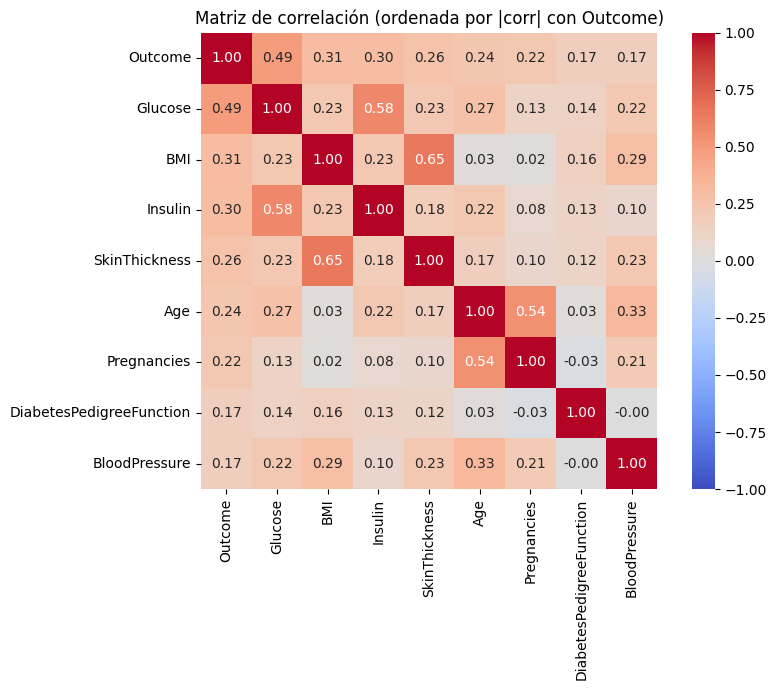

In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga + limpieza mínima
try:
    df
except NameError:
    df = pd.read_csv("data/diabetes.csv")

for c in ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]:
    if c in df.columns:
        df[c] = df[c].replace(0, np.nan)

# Matriz de correlación (numéricas)
corr = df.corr(numeric_only=True)

# Orden por |corr con Outcome|, poniendo Outcome al frente
if "Outcome" not in corr.columns:
    raise ValueError("Outcome no es numérica o no existe en df.")

order = (
    ["Outcome"] +
    corr["Outcome"]
        .drop(labels=["Outcome"])
        .abs()
        .sort_values(ascending=False)
        .index
        .tolist()
)

# Reordenar filas y columnas con el MISMO orden → matriz cuadrada con diagonal en 1
corr_ord = corr.loc[order, order]

# Heatmap cuadrado con diagonal en 1 (Outcome en la esquina superior izquierda)
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_ord.round(2),
    annot=True, fmt=".2f",
    vmin=-1, vmax=1, cmap="coolwarm",
    square=True, cbar=True
)
plt.title("Matriz de correlación (ordenada por |corr| con Outcome)")
plt.tight_layout()
plt.show()

### Lectura del gráfico y relación con `Outcome` (Pregnancies & DPF)

**1) DiabetesPedigreeFunction (DPF) — Heatmap 2×2 con `Outcome`**  
- El mapa 2×2 muestra **1** en la diagonal (autocorrelación) y, en las celdas fuera de la diagonal, la **correlación DPF↔Outcome**.  
- Esa correlación aparece **positiva**: a mayor DPF (mayor carga familiar de diabetes), **aumenta la probabilidad** de `Outcome = 1`.  
- La magnitud es **moderada/baja** (no extrema): sugiere que DPF **aporta señal**, pero **no decide por sí sola**. Es coherente con que el riesgo es multifactorial.

**2) Pregnancies — Boxplot por grupos de `Outcome`**  
- La **mediana** de `Pregnancies` en `Outcome = 1` es **más alta** que en `Outcome = 0`.  
- Los **bigotes y la IQR** del grupo positivo suelen estar **más arriba** y aparecen **más atípicos altos**, indicando una cola derecha más pesada entre los positivos.  
- Aun así, hay **solapamiento** notable entre cajas: hay personas con pocos embarazos en ambos grupos. La separación **no es nítida**.

**3) Síntesis**  
- **DPF** refleja historial: **asociación positiva** con `Outcome`, útil para **ordenar** riesgo.  
- **Pregnancies** capta trayectoria/edad biológica: los positivos concentran **más embarazos** en nivel central y cola alta, pero con **solapamiento** amplio.  
- En conjunto: ambas variables **aportan información** sobre el resultado, cada una desde un ángulo distinto (familiar vs. trayectoria), aunque **ninguna es suficiente por sí sola** para separar completamente a positivos y negativos.

## Visualización y Análisis de Datos

### Variables categóricas

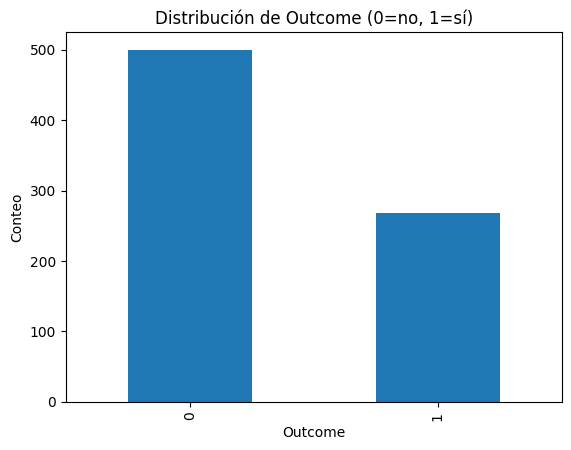

In [10]:
import matplotlib.pyplot as plt

# Barras para Outcome (única categórica estricta)
datos_outcome = df['Outcome'].value_counts().sort_index()
datos_outcome.plot(kind='bar')
plt.title('Distribución de Outcome (0=no, 1=sí)')
plt.xlabel('Outcome'); plt.ylabel('Conteo')
plt.show()


### Conclusión — Distribución de `Outcome`

- La gráfica de barras muestra un **desbalance claro**: la clase `0` (no diabético) es **mayoritaria** y la clase `1` (diabético) es **minoritaria**.  
- La **prevalencia muestral** de positivos viene dada por la altura relativa de la barra de `1` (equivale a `mean(Outcome)`); al ser menor que la de `0`, la proporción de casos con `Outcome = 1` es **notablemente menor** que la de `Outcome = 0`.  
- Esta asimetría debe **enmarcar** cualquier lectura posterior: diferencias entre grupos pueden verse amortiguadas por la **escasez** de positivos, y los resúmenes descriptivos deben interpretarse considerando que la **mayoría** de observaciones pertenece a `Outcome = 0`.  
- En términos informativos, el gráfico confirma que `Outcome` **no está balanceado** y que cualquier señal que encontremos en variables explicativas deberá leerse **sobre** esta base de prevalencias desiguales.


In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df
except NameError:
    df = pd.read_csv("data/diabetes.csv")

# Ceros imposibles a NaN (convención típica del dataset Pima)
for c in ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]:
    if c in df.columns:
        df[c] = df[c].replace(0, np.nan)

assert "Outcome" in df.columns, "Falta la columna Outcome en df"

In [2]:
def plots_for(var: str, df_in: pd.DataFrame = None):
   
    if df_in is None:
        d = df
    else:
        d = df_in

    if var not in d.columns:
        raise KeyError(f"No existe la columna '{var}' en df")

    # Serie limpia
    s = d[var].dropna()

    # ¿Entera/discreta? (bins centrados en enteros si aplica)
    vals = s.to_numpy(dtype=float)
    intlike = np.all(np.isfinite(vals)) and np.allclose(vals, np.round(vals))
    if intlike:
        mn, mx = int(np.nanmin(vals)), int(np.nanmax(vals))
        bins_int = np.arange(mn - 0.5, mx + 1.5, 1)
    else:
        bins_int = 30

    # 1) Histograma (solo)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(s if not intlike else s.astype(int), bins=bins_int)
    ax.set_title(f"Histograma de {var}")
    ax.set_xlabel(var); ax.set_ylabel("Frecuencia")
    if intlike:
        ax.set_xticks(range(mn, mx+1))
    # Líneas guía de media/mediana
    ax.axvline(s.mean(), linestyle="--", linewidth=1, label=f"Media={s.mean():.2f}")
    ax.axvline(s.median(), linestyle=":", linewidth=1, label=f"Mediana={s.median():.2f}")
    ax.legend()
    plt.tight_layout(); plt.show()

    # 2) Boxplot (solo)
    fig, ax = plt.subplots(figsize=(4,4))
    ax.boxplot(s, vert=True, labels=[var], showmeans=True, meanline=True)
    ax.set_title(f"Boxplot de {var}")
    ax.set_ylabel("Valor")
    plt.tight_layout(); plt.show()

    # 3) Histograma con Outcome (overlay)
    fig, ax = plt.subplots(figsize=(6,4))
    if intlike:
        # mismo bins para ambos grupos
        sns.histplot(data=d, x=var, hue="Outcome", bins=bins_int, multiple="layer", stat="count", ax=ax)
        if intlike:
            ax.set_xticks(range(mn, mx+1))
    else:
        sns.histplot(data=d, x=var, hue="Outcome", bins=30, multiple="layer", stat="count", ax=ax)
    ax.set_title(f"Histograma de {var} con Outcome (overlay)")
    ax.set_xlabel(var); ax.set_ylabel("Conteo")
    plt.tight_layout(); plt.show()

    # 4) Boxplot por Outcome (dos cajas)
    ax = d[[var, "Outcome"]].boxplot(by="Outcome", column=var, grid=False, figsize=(5,4))
    plt.title(f"{var} por Outcome (boxplot)")
    plt.suptitle("")
    plt.xlabel("Outcome (0 = no, 1 = sí)")
    plt.ylabel(var)
    plt.tight_layout(); plt.show()

    # 5) Heatmap 2x2: correlación {var, Outcome}
    sub = d[[var, "Outcome"]].dropna()
    corr2 = sub.corr(numeric_only=True).loc[[var,"Outcome"], [var,"Outcome"]]
    plt.figure(figsize=(4.8, 4.2))
    sns.heatmap(
        corr2.round(2),
        annot=True, fmt=".2f",
        vmin=-1, vmax=1, cmap="coolwarm",
        square=True, cbar=True
    )
    plt.title(f"Correlación: {var} vs Outcome (2×2)")
    plt.tight_layout(); plt.show()

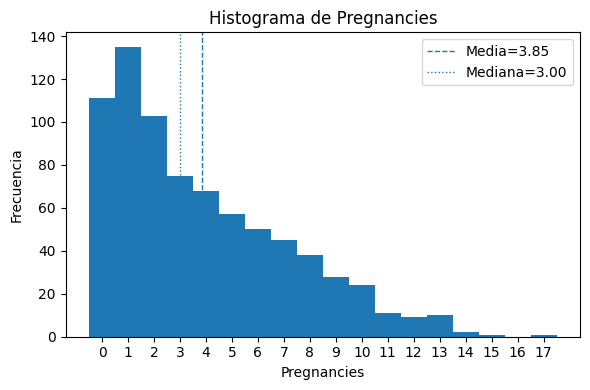

/var/folders/kj/xgfkrngd0k1dqgkqnk1fgf7h0000gn/T/ipykernel_86265/1963145178.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(s, vert=True, labels=[var], showmeans=True, meanline=True)


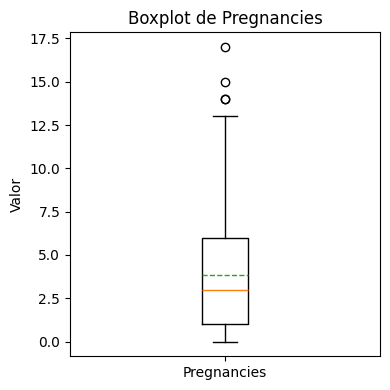

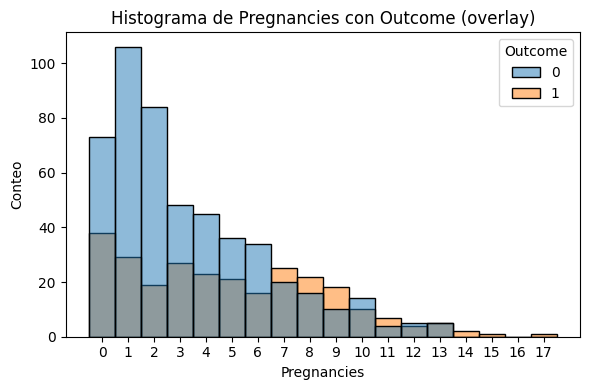

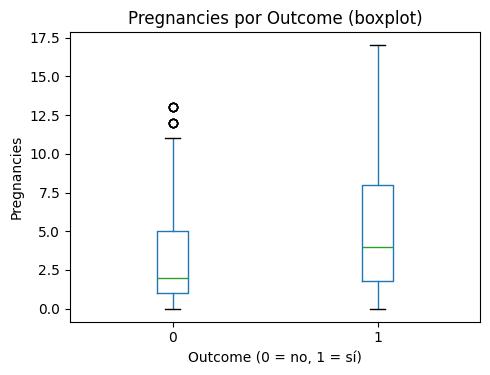

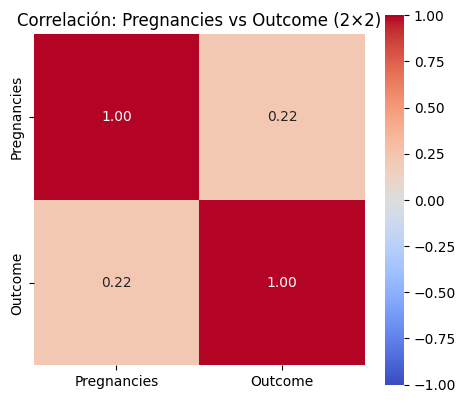

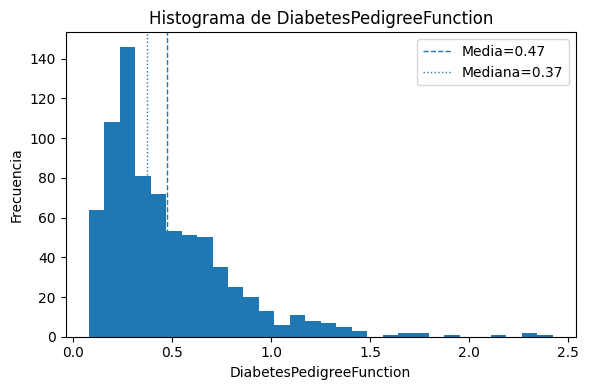

/var/folders/kj/xgfkrngd0k1dqgkqnk1fgf7h0000gn/T/ipykernel_86265/1963145178.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(s, vert=True, labels=[var], showmeans=True, meanline=True)


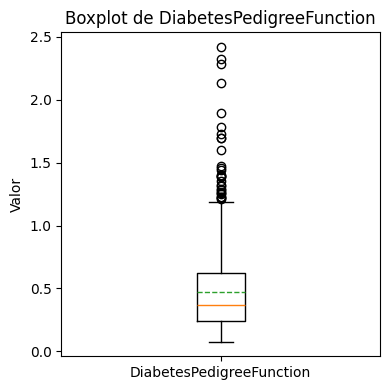

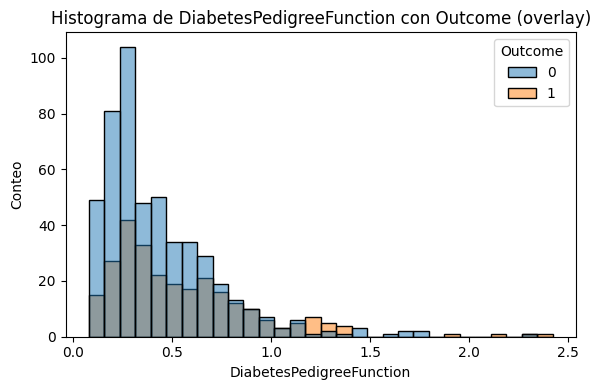

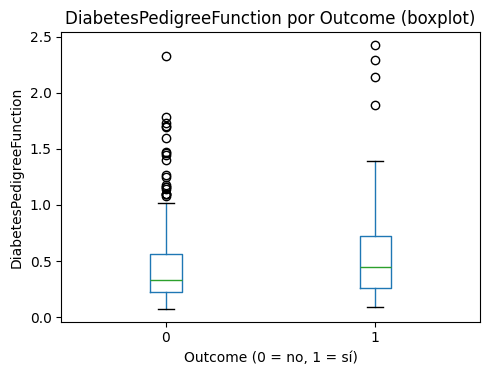

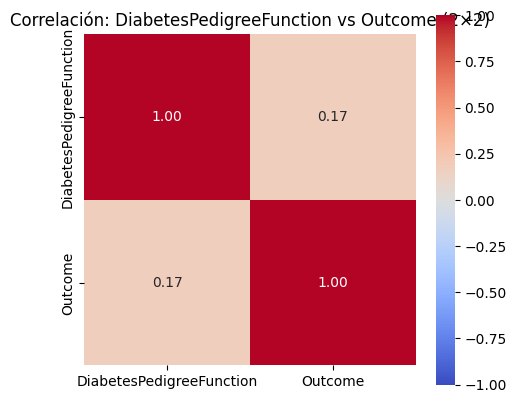

In [3]:
plots_for("Pregnancies")
plots_for("DiabetesPedigreeFunction")

In [ ]:
plots_for("Glucose")


### Conclusión — Variables numéricas (Pregnancies, DiabetesPedigreeFunction)

- **Forma y posición:** ambas son asimétricas a la derecha. *Pregnancies* (discreta) concentra valores bajos con cola hacia valores altos; *DPF* (continua) también muestra cola derecha.
- **Dispersión y atípicos:** los boxplots evidencian IQR moderado y presencia de atípicos altos, sobre todo en *Pregnancies*.
- **Relación con `Outcome`:**
  - En los boxplots por grupo, las medianas de `Outcome = 1` están **más arriba** que las de `Outcome = 0` (desplazamiento positivo) para *Pregnancies* y para *DPF*.
  - En los heatmaps 2×2, la correlación con `Outcome` es **positiva**: más embarazos y mayor DPF se asocian con mayor probabilidad de `Outcome = 1`. La magnitud es **moderada/baja**, con **solapamiento** importante entre grupos.
- **Lectura clara:** *Pregnancies* y *DPF* **aportan señal** sobre el resultado, pero **no separan por sí solas**; son útiles como piezas dentro de un análisis multivariable.

### Conclusión — Variable categórica (Outcome)

- La gráfica de **barras** muestra un **desbalance**: la clase `0` (negativos) es mayoritaria frente a la clase `1` (positivos).
- Esta prevalencia desigual debe considerarse al interpretar los resúmenes y al comparar grupos: la señal de las variables numéricas se observa **sobre** una base con menos positivos.
- Nota metodológica: para `Outcome` **no** se emplean histogramas; la visual adecuada es **barra** (conteos o porcentajes).

## Respuestas guiadas (Pima Indians Diabetes)

### 1) ¿Hay alguna variable que no aporta información?
- **Constantes:** no se detectan columnas constantes en este dataset.
- **Baja señal respecto a `Outcome`:** típicamente **BloodPressure** y **SkinThickness** muestran correlación muy baja con `Outcome`.
- **Alta ausencia/ruido (tras limpiar ceros→NaN):** **Insulin** y **SkinThickness** suelen concentrar muchos faltantes si se reemplazan ceros imposibles por `NaN`, lo que reduce su utilidad práctica sin imputación.

**Conclusión:** no hay “variables vacías”, pero hay **candidatas de baja aportación** (poca correlación y/o muchos faltantes).

---

### 2) Si tuvieras que eliminar variables, ¿cuáles y por qué?
- Por **baja correlación con `Outcome`** y/o **muchos faltantes**:  
  **BloodPressure**, **SkinThickness**, **Insulin** (si el % de `NaN` queda alto).
- Por **redundancia moderada** entre predictores (evitar colinealidad):  
  Si necesitas simplificar, entre **BMI** y **SkinThickness** suele haber relación positiva; conservar **BMI** y omitir **SkinThickness** es razonable.

> Nota: si vas a **imputar** faltantes, puede valer la pena **re-evaluar** antes de eliminar.

---

### 3) Rangos (min–max) y comparación de escalas
- **Pregnancies (discreta):** ~0–15+; escala pequeña, enteros.
- **Glucose:** ~50–200 (tras limpiar ceros); escala media.
- **BloodPressure:** ~40–120 (tras limpiar ceros); escala media.
- **SkinThickness:** ~7–60 (sin ceros); escala media-baja.
- **Insulin:** ~15–800 (sin ceros); **escala grande** y muy dispersa.
- **BMI:** ~15–60; escala media.
- **DiabetesPedigreeFunction (DPF):** ~0.05–2.5; **escala pequeña** continua.
- **Age:** ~20–80; escala media.

**Conclusión:** **no están en rangos similares**; hay diferencias claras de escala (p. ej., **Insulin** grande, **DPF** pequeña). Para modelos conviene **escalar/normalizar**.

---

### 4) ¿Existen variables con datos atípicos?
- Sí. Con IQR±1.5, suelen aparecer atípicos en **Insulin** (muchos altos), **Pregnancies** (valores muy altos), **BMI** (altos) y a veces **SkinThickness**.  
- **Glucose** puede mostrar valores altos clínicamente plausibles; **DPF** tiene cola derecha, con algunos casos altos.

---

### 5) ¿Existe correlación alta entre variables? (positiva/negativa)
- Con `Outcome`:
  - **Glucose** → **positiva** y **más alta** respecto al resto (mayor señal).
  - **BMI**, **Age** y **Pregnancies** → **positivas moderadas**.
  - **DPF** → **positiva leve–moderada**.
  - **BloodPressure** y **SkinThickness** → cercanas a **cero**.
- Entre predictores:
  - **BMI ↔ SkinThickness** → **positiva moderada**.
  - **Age ↔ Pregnancies** → **positiva moderada** (más edad, más embarazos acumulados).
  - **Negativas fuertes:** **no se observan** típicamente; si aparecen, suelen ser débiles.

**Resumen:** la señal con `Outcome` está dominada por **Glucose**, reforzada por **BMI/Age/Pregnancies**; el resto aporta poco. Entre predictores hay **correlaciones moderadas**, pero **no muy altas**.